## BFS Traversal

```
Given an undirected and disconnected graph G(V, E), print its BFS traversal.

Note:

1. Here you need to consider that you need to print BFS path starting from vertex 0 only.
2. V is the number of vertices present in graph G and vertices are numbered from 0 to V-1.
3. E is the number of edges present in graph G.
4. Take graph input in the adjacency matrix.
5. Handle for Disconnected Graphs as well
Detailed explanation ( Input/output format, Notes, Images )
Input Format :
The first line of input contains two integers, that denote the value of V and E.
Each of the following E lines contains space separated two integers, that denote that there exists an edge between vertex a and b.
Output Format :
Print the BFS Traversal, as described in the task.
Constraints :
0 <= V <= 1000
0 <= E <= (V * (V - 1)) / 2
0 <= a <= V - 1
0 <= b <= V - 1
Time Limit: 1 second
Sample Input 1:
4 4
0 1
0 3
1 2
2 3
Sample Output 1:
0 1 3 2
```

In [ ]:
from collections import deque

def bfs_traversal(v, edges):
    # Create adjacency matrix
    adj_matrix = [[0] * v for _ in range(v)]

    # Fill the adjacency matrix
    for (a, b) in edges:
        adj_matrix[a][b] = 1
        adj_matrix[b][a] = 1

    # Initialize visited list
    visited = [False] * v
    bfs_result = []

    def bfs(start_vertex):
        queue = deque([start_vertex])
        visited[start_vertex] = True

        while queue:
            current = queue.popleft()
            bfs_result.append(current)

            for neighbor in range(v):
                if adj_matrix[current][neighbor] == 1 and not visited[neighbor]:
                    queue.append(neighbor)
                    visited[neighbor] = True

    # Perform BFS for each component
    for i in range(v):
        if not visited[i]:
            bfs(i)

    return bfs_result

def main():
    # Read input
    v, e = map(int, input().split())
    edges = []
    for _ in range(e):
        a, b = map(int, input().split())
        edges.append((a, b))

    # Get BFS traversal
    bfs_result = bfs_traversal(v, edges)

    # Print result
    print(" ".join(map(str, bfs_result)))

# Sample Input:
# 4 4
# 0 1
# 0 3
# 1 2
# 2 3

# Expected Output:
# 0 1 3 2

if __name__ == "__main__":
    main()

### Using Adjacency List - Less efficient(to get exact CN ouput)

In [12]:
import queue

class Graph:

  def __init__(self, V, E):
    self.graph = []
    self.visited = []
    for i in range(V):
      self.graph.append([])
      self.visited.append(False)
    #number of vertices
    self.V = V
    #number of edges
    self.E = E

  def add_edge(self, u, v):
    #edge from u to v
    self.graph[u].append(v)
    self.graph[u].sort()
    #edge from v to u
    self.graph[v].append(u)
    self.graph[v].sort()

  def bfs(self, s):
    q = queue.Queue()
    q.put(s)
    while not q.empty():
      current = q.get()

      if self.visited[current] == False:
        print(current, end = " ")
        self.visited[current] = True

      for relative in self.graph[current]:
        if self.visited[relative] == False:
          q.put(relative)

    # #traversing disconnected nodes
    # if False in self.visited:
    #   for i in range(self.V):
    #     if self.visited[i] == False:
    #       self.bfs(i)

v, e = tuple([int(i) for i in input().split()])

g = Graph(v, e)

for i in range(e):
  v1, v2 = tuple([int(i) for i in input().split()])
  g.add_edge(v1, v2)

if g.V > 0:
  for i in range(g.V):
    if g.visited[i] == False:
      g.bfs(i)

4 4
0 1
0 3
1 2
2 3
0 1 3 2 

'\n4 4\n0 1\n0 3\n1 2\n2 3\n'

In [ ]:
"""
4 4
0 1
0 3
1 2
2 3
"""

In [5]:
g.print()

[[1, 3], [0, 2], [1, 3], [0, 2]]


## Has Path

```
Given an undirected graph G(V, E) and two vertices v1 and v2 (as integers), check if there exists any path between them or not. Print true if the path exists and false otherwise.

Note:

1. V is the number of vertices present in graph G and vertices are numbered from 0 to V-1.
2. E is the number of edges present in graph G.
Detailed explanation ( Input/output format, Notes, Images )
Input Format :
The first line of input contains two integers, that denote the value of V and E.
Each of the following E lines contains two integers, that denote that there exists an edge between vertex 'a' and 'b'.
The following line contain two integers, that denote the value of v1 and v2.
Output Format :
The first and only line of output contains true, if there is a path between v1 and v2 and false otherwise.
Constraints :
0 <= V <= 1000
0 <= E <= 1000
0 <= a <= V - 1
0 <= b <= V - 1
0 <= v1 <= V - 1
0 <= v2 <= V - 1
Time Limit: 1 second
Sample Input 1 :
4 4
0 1
0 3
1 2
2 3
1 3
Sample Output 1 :
true
Sample Input 2 :
6 3
5 3
0 1
3 4
0 3
Sample Output 2 :
false
```

### DFS

In [ ]:
class Graph:
    def __init__(self, V, E):
        self.graph = [[] for _ in range(V)]
        self.V = V
        self.E = E

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def is_connected(self, v1, v2):
        #v2 is a neighbour
        if v2 in self.graph[v1]:
            return True
        #no edges or no vertices
        if self.E == 0 or self.V == 0:
            return False
        #v1 does not have any neighbours
        if not self.graph[v1]:
            return False

        visited = [False] * self.V

        def dfs(node):
            if node == v2:
                return True
            visited[node] = True
            for neighbour in self.graph[node]:
                if not visited[neighbour]:
                    if dfs(neighbour):
                        return True
            return False

        return dfs(v1)

# Main
# Number of vertices and edges
v, e = tuple(map(int, input().split()))
# Initiating graph object
g = Graph(v, e)
# Adding edges
for _ in range(e):
    v1, v2 = tuple(map(int, input().split()))
    g.add_edge(v1, v2)

v1, v2 = tuple(map(int, input().split()))

print("true" if g.is_connected(v1, v2) else "false")

### BFS

In [ ]:
from collections import deque

def is_path_exists(v, edges, v1, v2):
    # Create adjacency list
    adj_list = [[] for _ in range(v)]
    for a, b in edges:
        adj_list[a].append(b)
        adj_list[b].append(a)

    # Initialize visited list
    visited = [False] * v

    # BFS to check connectivity
    def bfs(start, target):
        queue = deque([start])
        visited[start] = True

        while queue:
            current = queue.popleft()
            if current == target:
                return True

            for neighbor in adj_list[current]:
                if not visited[neighbor]:
                    queue.append(neighbor)
                    visited[neighbor] = True

        return False

    # Check if there's a path between v1 and v2
    return bfs(v1, v2)

def main():
    # Read input
    v, e = map(int, input().split())
    edges = [tuple(map(int, input().split())) for _ in range(e)]
    v1, v2 = map(int, input().split())

    # Check path existence
    result = is_path_exists(v, edges, v1, v2)

    # Print result
    print("true" if result else "false")

# Sample Input:
# 4 4
# 0 1
# 0 3
# 1 2
# 2 3
# 1 3

# Expected Output:
# true

# Sample Input:
# 6 3
# 5 3
# 0 1
# 3 4
# 0 3

# Expected Output:
# false

if __name__ == "__main__":
    main()

## Get Path

```
Given an undirected graph G(V, E) and two vertices v1 and v2(as integers), find and print the path from v1 to v2 (if exists). Print nothing if there is no path between v1 and v2.

Find the path using DFS and print the first path that you encountered.

Note:

1. V is the number of vertices present in graph G and vertices are numbered from 0 to V-1.
2. E is the number of edges present in graph G.
3. Print the path in reverse order. That is, print v2 first, then intermediate vertices and v1 at last.
4. Save the input graph in Adjacency Matrix.
Detailed explanation ( Input/output format, Notes, Images )
Input Format :
The first line of input contains two integers, that denote the value of V and E.
Each of the following E lines contains two integers, that denote that there exists an edge between vertex 'a' and 'b'.
The following line contain two integers, that denote the value of v1 and v2.
Output Format :
Print the path from v1 to v2 in reverse order.
Constraints :
2 <= V <= 1000
1 <= E <= (V * (V - 1)) / 2
0 <= a <= V - 1
0 <= b <= V - 1
0 <= v1 <= 2^31 - 1
0 <= v2 <= 2^31 - 1
Time Limit: 1 second
Sample Input 1:
4 4
0 1
0 3
1 2
2 3
1 3
Sample Output 1:
3 0 1
```

In [ ]:
import sys
sys.setrecursionlimit(10**9)

def dfs(graph, v, visited, path, target):
    # Mark the current vertex as visited
    visited[v] = True

    # Append the current vertex to the path
    path.append(v)

    # If the current vertex is the target, return the path
    if v == target:
        return path

    # Recur for all adjacent vertices
    for i in range(len(graph)):
        if graph[v][i] == 1 and not visited[i]:
            new_path = dfs(graph, i, visited, path, target)
            # If a path is found, return it
            if new_path:
                return new_path

    # If no path is found, backtrack
    path.pop()
    return None

def find_path(graph, v1, v2):
    # Initialize variables
    V = len(graph)
    visited = [False] * V
    path = []

    # Find path using DFS
    result = dfs(graph, v1, visited, path, v2)

    # Print the path in reverse order
    if result:
        print(*result[::-1])

# Read input
V, E = map(int, input().split())
graph = [[0] * V for _ in range(V)]
for _ in range(E):
    a, b = map(int, input().split())
    graph[a][b] = 1
    graph[b][a] = 1
v1, v2 = map(int, input().split())

# Find and print the path
find_path(graph, v1, v2)

### 11/12 Test Cases

In [ ]:
import sys
sys.setrecursionlimit(10**9)

class Graph:
    def __init__(self, V, E):
        self.graph = [[] for _ in range(V)]
        self.V = V
        self.E = E

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def get_path_dfs(self, v1, v2):
        #no edges or no vertices
        if self.E == 0 or self.V == 0:
            return None
        #v1 does not have any neighbours
        if not self.graph[v1]:
            return None

        visited = [False] * self.V
        path = []

        def dfs(node, path):
            path.append(node)
            if node == v2:
                return path
            visited[node] = True
            for neighbour in self.graph[node]:
                if not visited[neighbour]:
                    return dfs(neighbour, path)

        return dfs(v1, path)

# Main
# Number of vertices and edges
v, e = tuple(map(int, input().split()))
# Initiating graph object
g = Graph(v, e)
# Adding edges
for _ in range(e):
    v1, v2 = tuple(map(int, input().split()))
    g.add_edge(v1, v2)

v1, v2 = tuple(map(int, input().split()))

path = g.get_path_dfs(v1, v2)
if path:
  print(*path[::-1])

## Get Path - BFS

```
Given an undirected graph G(V, E) and two vertices v1 and v2 (as integers), find and print the path from v1 to v2 (if exists). Print nothing if there is no path between v1 and v2.

Find the path using BFS and print the shortest path available.

Note:

1. V is the number of vertices present in graph G and vertices are numbered from 0 to V-1.
2. E is the number of edges present in graph G.
3. Print the path in reverse order. That is, print v2 first, then intermediate vertices and v1 at last.
4. Save the input graph in Adjacency Matrix.
Detailed explanation ( Input/output format, Notes, Images )
Input Format :
The first line of input contains two integers, that denote the value of V and E.
Each of the following E lines contains two integers, that denote that there exists an edge between vertex a and b.
The following line contain two integers, that denote the value of v1 and v2.
Output Format :
Print the path from v1 to v2 in reverse order.
Constraints :
2 <= V <= 1000
1 <= E <= (V * (V - 1)) / 2
0 <= a <= V - 1
0 <= b <= V - 1
0 <= v1 <= 2^31 - 1
0 <= v2 <= 2^31 - 1
Time Limit: 1 second
Sample Input 1 :
4 4
0 1
0 3
1 2
2 3
1 3
Sample Output 1 :
3 0 1
Sample Input 2 :
6 3
5 3
0 1
3 4
0 3
```

In [ ]:
import queue
from sys import stdin, setrecursionlimit

# Setting recursion limit for deep recursion cases
setrecursionlimit(10**6)

# Graph class
class Graph:
    def __init__(self, nVertices):
        self.nVertices = nVertices
        self.adjMatrix = [[0 for i in range(nVertices)] for j in range(nVertices)]

    # Adding an edge
    def addEdge(self, v1, v2):
        self.adjMatrix[v1][v2] = 1
        self.adjMatrix[v2][v1] = 1

    # Removing an edge
    def removeEdge(self, v1, v2):
        if not self.containsEdge(v1, v2):
            return
        self.adjMatrix[v1][v2] = 0
        self.adjMatrix[v2][v1] = 0

    # Checking if an edge exists
    def containsEdge(self, v1, v2):
        return self.adjMatrix[v1][v2] > 0

    # String representation of the graph
    def __str__(self):
        return str(self.adjMatrix)

    # Private method to get path using BFS
    def __getPathBFS(self, sv, ev, visited):
        mapp = {}
        q = queue.Queue()
        if self.adjMatrix[sv][ev] == 1 and sv == ev:
            return [sv]
        q.put(sv)
        visited[sv] = True
        while not q.empty():
            front = q.get()
            for i in range(self.nVertices):
                if self.adjMatrix[front][i] == 1 and not visited[i]:
                    mapp[i] = front
                    q.put(i)
                    visited[i] = True
                    if i == ev:
                        ans = [ev]
                        value = mapp[ev]
                        while value != sv:
                            ans.append(value)
                            value = mapp[value]
                        ans.append(value)
                        return ans
        return []

    # Public method to get path using BFS
    def getPathBFS(self, sv, ev):
        if sv > (self.nVertices - 1) or ev > (self.nVertices - 1):
            return []
        visited = [False for i in range(self.nVertices)]
        return self.__getPathBFS(sv, ev, visited)

# Main
li = stdin.readline().strip().split()
V = int(li[0])
E = int(li[1])
g = Graph(V)

for i in range(E):
    arr = stdin.readline().strip().split()
    fv = int(arr[0])
    sv = int(arr[1])
    g.addEdge(fv, sv)

li = stdin.readline().strip().split()
sv = int(li[0])
ev = int(li[1])
li = g.getPathBFS(sv, ev)

if len(li) != 0:
    for element in li:
        print(element, end=' ')

## Is Connected?

```
Given an undirected graph G(V,E), check if the graph G is connected graph or not.

Note:

1. V is the number of vertices present in graph G and vertices are numbered from 0 to V-1.
2. E is the number of edges present in graph G.
Detailed explanation ( Input/output format, Notes, Images )
Input Format :
The first line of input contains two integers, that denote the value of V and E.
Each of the following E lines contains two integers, that denote that there exists an edge between vertex a and b.
Output Format :
The first and only line of output contains "true" if the given graph is connected or "false", otherwise.
Constraints :
0 <= V <= 1000
0 <= E <= (V * (V - 1)) / 2
0 <= a <= V - 1
0 <= b <= V - 1
Time Limit: 1 second
Sample Input 1:
4 4
0 1
0 3
1 2
2 3
Sample Output 1:
true
Sample Input 2:
4 3
0 1
1 3
0 3
Sample Output 2:
false
Sample Output 2 Explanation
The graph is not connected, even though vertices 0,1 and 3 are connected to each other but there isn’t any path from vertices 0,1,3 to vertex 2.
```

In [ ]:
import sys
sys.setrecursionlimit(10**9)
def dfs(graph, v, visited):

    # Mark the current vertex as visited
    visited[v] = True

    # Recur for all adjacent vertices
    for i in range(len(graph)):
        if graph[v][i] == 1 and not visited[i]:
            dfs(graph, i, visited)

def is_connected(graph):
    # Initialize variables
    V = len(graph)
    if V == 0:
      return True
    visited = [False] * V

    # Find a starting vertex to begin DFS traversal
    start_vertex = 0
    for i in range(V):
        if sum(graph[i]) > 0:
            start_vertex = i
            break

    # Perform DFS traversal
    dfs(graph, start_vertex, visited)

    # Check if all vertices are visited
    return all(visited)

# Read input
V, E = map(int, input().split())
graph = [[0] * V for _ in range(V)]
for _ in range(E):
    a, b = map(int, input().split())
    graph[a][b] = 1
    graph[b][a] = 1

# Check if the graph is connected and print the result
print("true" if is_connected(graph) else "false")

## All Connected Components

```
Given an undirected graph G(V,E), find and print all the connected components of the given graph G.

Note:

1. V is the number of vertices present in graph G and vertices are numbered from 0 to V-1.
2. E is the number of edges present in graph G.
3. You need to take input in main and create a function which should return all the connected components. And then print them in the main, not inside function.
Print different components in new line. And each component should be printed in increasing order (separated by space). Order of different components doesn't matter.

Detailed explanation ( Input/output format, Notes, Images )
Input Format :
The first line of input contains two integers, that denote the value of V and E.
Each of the following E lines contains two space separated integers, that denote that there exists an edge between vertex a and b.
Output Format :
Print different components in new line. And each component should be printed in increasing order of vertices (separated by space). Order of different components doesn't matter.
Constraints :
0 <= V <= 1000
0 <= E <= (V * (V - 1)) / 2
0 <= a <= V - 1
0 <= b <= V - 1
Sample Input 1:
4 2
0 1
2 3
Sample Output 1:
0 1
2 3
Sample Input 2:
4 3
0 1
1 3
0 3
Sample Output 2:
0 1 3
2
```

In [ ]:
import sys
sys.setrecursionlimit(10**9)

def dfs(graph, v, visited, component):
    # Mark the current vertex as visited
    visited[v] = True

    # Add the current vertex to the current component
    component.append(v)

    # Recur for all adjacent vertices
    for i in range(len(graph)):
        if graph[v][i] == 1 and not visited[i]:
            dfs(graph, i, visited, component)

def connected_components(graph):
    V = len(graph)
    visited = [False] * V
    components = []

    # Find connected components using DFS
    for v in range(V):
        if not visited[v]:
            component = []
            dfs(graph, v, visited, component)
            components.append(sorted(component))

    return components

# Read input
V, E = map(int, input().split())
graph = [[0] * V for _ in range(V)]
for _ in range(E):
    a, b = map(int, input().split())
    graph[a][b] = 1
    graph[b][a] = 1

# Find and print connected components
components = connected_components(graph)
for component in components:
    print(*component)

# Assignment

## Coding Ninjas

```
Given a NxM matrix containing Uppercase English Alphabets only. Your task is to tell if there is a path in the given matrix which makes the sentence “CODINGNINJA” .

There is a path from any cell to all its neighbouring cells. For a particular cell, neighbouring cells are those cells that share an edge or a corner with the cell.

Detailed explanation ( Input/output format, Notes, Images )
Input Format :
The first line of input contains two space separated integers N and M, where N is number of rows and M is the number of columns in the matrix.
Each of the following N lines contain M characters. Please note that characters are not space separated.
Output Format :
Print 1 if there is a path which makes the sentence “CODINGNINJA” else print 0.
Constraints :
1 <= N <= 100
1 <= M <= 100
Time Limit: 1 second
Sample Input 1:
2 11
CXDXNXNXNXA
XOXIXGXIXJX
Sample Output 1:
1
```

In [ ]:
from sys import stdin

# Directions for the DFS traversal
dir = [[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]]

# Pattern to search for in the grid
pattern = ['C', 'O', 'D', 'I', 'N', 'G', 'N', 'I', 'N', 'J', 'A']

# Function to check if a position is valid within the grid
def validPo(x, y, n, m):
    return (x >= 0 and x < n and y >= 0 and y < m)

# DFS function to find the pattern in the grid
def DFS(arr, used, x, y, index, n, m):
    if (index == 11):
        return 1
    used[x][y] = True
    found = 0
    for i in range(8):
        newx = x + dir[i][0]
        newy = y + dir[i][1]
        if(validPo(newx, newy, n, m) and arr[newx][newy] == pattern[index] and not used[newx][newy]):
            found = found | DFS(arr, used, newx, newy, index + 1, n, m)
    used[x][y] = False
    return found

# Main solve function to initiate the DFS search
def solve(arr, n, m):
    found = 0
    used = [[False for i in range(m)] for j in range(n)]
    for i in range(n):
        for j in range(m):
            if (arr[i][j] == 'C'):
                found = DFS(arr, used, i, j, 1, n, m)
                if (found != 0):
                    break
        if (found != 0):
            break
    return found

# Function to take input from the user
def takeInput():
    # To take fast I/O
    n, m = list(map(int, stdin.readline().strip().split()))
    arr = [stdin.readline().strip() for i in range(n)]
    return arr, n, m

#Main
arr,n,m=takeInput()
print(solve(arr,n,m))

## Connecting Dots

```
Gary has a board of size NxM. Each cell in the board is a coloured dot. There exist only 26 colours denoted by uppercase Latin characters (i.e. A,B,...,Z). Now Gary is getting bored and wants to play a game. The key of this game is to find a cycle that contain dots of same colour. Formally, we call a sequence of dots d1, d2, ..., dk a cycle if and only if it meets the following condition:

1. These k dots are different: if i ≠ j then di is different from dj.
2. k is at least 4.
3. All dots belong to the same colour.
4. For all 1 ≤ i ≤ k - 1: di and di + 1 are adjacent. Also, dk and d1 should also be adjacent. Cells x and y are called adjacent if they share an edge.
Since Gary is colour blind, he wants your help. Your task is to determine if there exists a cycle on the board.

Detailed explanation ( Input/output format, Notes, Images )
Input Format :
The first line of input contains two space separated integers N and M, where N is number of rows and M is the number of columns of the board.
Each of the following N lines contain M characters. Please note that characters are not space separated. Each character is an uppercase Latin letter.
Output Format :
Print true if there is a cycle in the board, else print false.
Constraints :
2 <= N <= 50
2 <= M <= 50
Time Limit: 1 second
Sample Input 1:
3 4
AAAA
ABCA
AAAA
Sample Output 1:
true
```

In [ ]:
from sys import stdin

# Directions for the DFS traversal
dx = [1, -1, 0, 0]
dy = [0, 0, 1, -1]

# DFS function to find if there's a needColor starting from (x, y)
def dfs(board, x, y, fromX, fromY, needColor, n, m, visited):
    # Base conditions for DFS
    if (x < 0 or x >= n or y < 0 or y >= m):
        return False
    if (board[x][y] != needColor):
        return False
    if (visited[x][y]):
        return True

    # Mark the current cell as visited
    visited[x][y] = 1
    ans = False

    # Explore all four directions
    for f in range(4):
        nextX = x + dx[f]
        nextY = y + dy[f]

        # Skip the cell from which it came
        if (nextX == fromX and nextY == fromY):
            continue

        # Recursively call DFS and combine results with OR
        ans |= dfs(board, nextX, nextY, x, y, needColor, n, m, visited)

    return ans

# Solve function to initiate the DFS search
def solve(board, n, m):
    # Initialize visited matrix
    visited = [[0 for i in range(m + 1)] for j in range(n + 1)]
    ans = False

    # Check each cell for the start of DFS
    for i in range(n):
        for j in range(m):
            if (not visited[i][j]):
                ans |= dfs(board, i, j, -1, -1, board[i][j], n, m, visited)

    return ans

# Function to take input from the user
def takeInput():
    # To take fast I/O
    n, m = list(map(int, stdin.readline().strip().split()))
    arr = [stdin.readline().strip() for i in range(n)]
    return arr, n, m

# Main function to execute the program
arr, n, m = takeInput()
ans = solve(arr, n, m)
if(ans):
    print('true')
else:
    print('false')

## Cycle detection in undirected graph

```
You have been given an undirected graph with 'N' vertices and 'M' edges. The vertices are labelled from 1 to 'N'.

Your task is to find if the graph contains a cycle or not.

A path that starts from a given vertex and ends at the same vertex traversing the edges only once is called a cycle.

Example :

In the below graph, there exists a cycle between vertex 1, 2 and 3.
Example

Note:

1. There are no parallel edges between two vertices.

2. There are no self-loops(an edge connecting the vertex to itself) in the graph.

3. The graph can be disconnected.
For Example :

Input: N = 3 , Edges =  [[1, 2], [2, 3], [1, 3]].
Output: Yes

Explanation : There are a total of 3 vertices in the graph. There is an edge between vertex 1 and 2, vertex 2 and 3 and vertex 1 and 3. So, there exists a cycle in the graph.
Detailed explanation ( Input/output format, Notes, Images )
Input Format:
The first line of input contains an integer 'T' which denotes the number of test cases or queries to be run. Then the test cases follow.

The first line of each test case contains two single space-separated integers ‘N’ and ‘M’ representing the total number of vertices and edges, respectively.

The next ‘M’ lines contain two single space-separated integers representing an edge of the graph.
Output Format:
For each test case, the only line of output will return “Yes” if there exists a cycle in the graph. Else print “No”.
Note:
You are not required to print the expected output, it has already been taken care of. Just implement the function.
Constraints:
1 <= T <= 10
1 <= N <= 5000
0 <= M <= min(5000, (N * (N - 1)) / 2)
1 <= edges[i][0] <= N
1 <= edges[i][1] <= N

Time Limit: 1 sec
Sample Input 1:
1
3 2
1 2
2 3
Sample output 1:
No
Explanation of Sample output 1:
 The above graph can be represented as
Example

There are a total of 3 vertices in the graph.There is an edge between vertex 1 and 2 and vertex 2 and 3. So, there is no cycle present in the graph.
Sample Input 2:
2
4 0
4 3
1 4
4 3
3 1
Sample output 2:
No
Yes
```

In [ ]:
def isCyclicUtil(graph, v, visited, parent):
    visited[v] = True
    for i in graph[v]:
        if not visited[i]:
            if isCyclicUtil(graph, i, visited, v):
                return True
        elif parent != i:
            return True
    return False

def cycleDetection(edges, n, m):
    graph = {i: [] for i in range(1, n+1)}
    for edge in edges:
        graph[edge[0]].append(edge[1])
        graph[edge[1]].append(edge[0])

    visited = [False] * (n + 1)
    for i in range(1, n+1):
        if not visited[i]:
            if isCyclicUtil(graph, i, visited, -1):
                return "Yes"
    return "No"

## Detect cycle in a directed graph

```
Given a directed graph, check whether the graph contains a cycle or not. Your function should return true if the given graph contains at least one cycle, else return false.

Detailed explanation ( Input/output format, Notes, Images )
Input Format:
The first line of input contains an integer T, the number of test cases.

The first line of each test case contains two single space-separated integers ‘V’, and ‘E’. ‘V’ represents the number of nodes and ‘E’ represents the number of edges in the graph.

From the second line onwards of each test case, the next 'E' lines will denote the edges of the graph where every edge is defined by two single space-separated integers 'A' and 'B', which signifies an edge from vertex 'A’ to vertex 'B'.
Output Format:
For each test case print "true" if a cycle exists, else "false".
Constraints:
1 <= T <= 10
1 <= V <= 10^3
0 <= E <= 10^3
0 <= A, B < V

Time Limit: 1 sec
Sample Input 1:.
2
4 4
0 1
1 2
2 3
3 0
3 3
1 0
1 2
0 2
Sample Output 1:
true
false
Explanation for Sample Input 1:
In the first case,
From node 0 we can reach 0 again by following this sequence of nodes in the path: 0,1,2,3,0. As we can see in the image below.
Example

In the second case,
There is no cycle in the given graph. As we can see in the image below.
Example

Sample Input 2:
2
3 2
0 1
0 2
3 3
1 1
0 2
1 2
Sample Output 2:
false
true
```

In [ ]:
def isCyclicUtil(node, graph, visited, recStack):
    visited[node] = True
    recStack[node] = True

    for neighbour in graph[node]:
        if not visited[neighbour]:
            if isCyclicUtil(neighbour, graph, visited, recStack):
                return True
        elif recStack[neighbour]:
            return True

    recStack[node] = False
    return False

def isCyclic(edges, V, E):
    graph = {i: [] for i in range(V)}
    for A, B in edges:
        graph[A].append(B)

    visited = [False] * V
    recStack = [False] * V

    for node in range(V):
        if not visited[node]:
            if isCyclicUtil(node, graph, visited, recStack):
                return True
    return False

## 3 Cycle

```
Given a graph with N vertices (numbered from 0 to N-1) and M undirected edges, then count the distinct 3-cycles in the graph. A 3-cycle PQR is a cycle in which (P,Q), (Q,R) and (R,P) are connected by an edge.

Detailed explanation ( Input/output format, Notes, Images )
Input Format :
The first line of input contains two space separated integers, that denotes the value of N and M.
Each of the following M lines contain two integers, that denote the vertices which have an undirected edge between them. Let us denote the two vertices with the symbol u and v.
Output Format :
Print the count the number of 3-cycles in the given graph
Constraints :
1 <= N <= 100
1 <= M <= (N*(N-1))/2
0 <= u, v <= N-1
Time Limit: 1 sec
Sample Input 1:
3 3
0 1
1 2
2 0
Sample Output 1:
1
```

In [ ]:
def count_3_cycles(N, edges):
    # Create an adjacency matrix
    adj_matrix = [[0] * N for _ in range(N)]

    # Fill the adjacency matrix based on the edges
    for u, v in edges:
        adj_matrix[u][v] = 1
        adj_matrix[v][u] = 1

    # Count the 3-cycles
    cycle_count = 0
    for i in range(N):
        for j in range(i + 1, N):
            for k in range(j + 1, N):
                # Check if the combination of i, j, k forms a cycle
                if adj_matrix[i][j] and adj_matrix[j][k] and adj_matrix[k][i]:
                    cycle_count += 1

    return cycle_count

# Read input
v, e = map(int, input().split())
edges = []
for _ in range(e):
  a, b = map(int, input().split())
  edges.append((a, b))


print(count_3_cycles(v, edges))  # Output: 1

## Strongly Connected Components - Tarjan's Algorith

```
You are given an unweighted directed graph of 'V' vertices and 'E' edges. Your task is to print all the strongly connected components (SCCs) present in the graph.

Detailed explanation ( Input/output format, Notes, Images )
Input format:
The very first line of input contains an integer ‘T’ denoting the number of test cases.

The first line of every test case contains two space-separated integers ‘V’ and ‘E’ denoting the number of vertices and the number of edges present in the graph.

The next ‘E’ lines contain two space-separated integers ‘a’ and ‘b’ denoting a directed edge from vertex ‘a’ to ‘b’.
Note:
Use zero-based indexing for the vertices.
Output format:
For each test case, print space-separated vertices present in the strongly connected components of the graph, print the output for one SCC on each line.

The order of sequence does not matter.
Note:
You do not need to print anything, it has already been taken care of. Just implement the given function.
Constraints:
1 <= 'T' <= 300
1 <= 'V' <= 2000
'V' - 1 <= 'E' <= 2000
0 <= 'a, b' < 'V'

Time Limit: 1 sec
Sample Input 1:
1
5 6
0 1
1 2
1 4
2 3
3 2
4 0
Sample Output 1:
0 1 4
2 3
Explanation for Sample Input 1:
For the first test case, the graph is shown below. There are two SCCs in the graph, which are enclosed in the boxes as shown in the image below.
sample graph 1
```
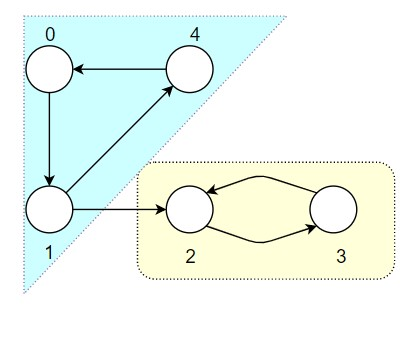

```
Sample Input 2:
2
1 0
4 4
0 1
1 2
2 3
3 1
Sample Output 2:
0
0
1 2 3
Explanation for Sample Input 2:
For the first test case, the graph has 1 node(0) but there are no edges, therefore only 1 SCC exists and that is {0}.

For the second test case, one SCC is {0} and the other is {1, 2, 3}. Therefore the answer is 0, 1 2 3
```

In [ ]:
def dfs(v, graph, visited, stack):
    visited[v] = True
    for neighbour in graph[v]:
        if not visited[neighbour]:
            dfs(neighbour, graph, visited, stack)
    stack.append(v)

def reverse_graph(V, graph):
    rev_graph = [[] for _ in range(V)]
    for v in range(V):
        for u in graph[v]:
            rev_graph[u].append(v)
    return rev_graph

def stronglyConnectedComponents(V, edges):

    E = len(edges)
    graph = [[] for _ in range(V)]
    for a, b in edges:
        graph[a].append(b)

    stack = []
    visited = [False] * V

    # Fill vertices in stack according to their finishing times
    for i in range(V):
        if not visited[i]:
            dfs(i, graph, visited, stack)

    # Create a reversed graph
    rev_graph = reverse_graph(V, graph)
    visited = [False] * V

    # Process all vertices in order defined by Stack
    sccs = []
    while stack:
        v = stack.pop()
        if not visited[v]:
            scc_stack = []
            dfs(v, rev_graph, visited, scc_stack)
            sccs.append(scc_stack)
    return sccs